In [31]:
# Let's bring the tools we need from our toolbox
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image


In [32]:
# Load the images and labels from the MNIST dataset
# x = images (pictures), y = labels (correct numbers)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Let's print shapes to understand what we got
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [33]:
# We divide the pixel values by 255 so that all values are between 0 and 1
# This helps our robot learn better and faster

x_train = x_train / 255.0
x_test = x_test / 255.0


In [34]:
# The labels are numbers like 0, 1, 2,...9
# We convert them to one-hot form: e.g., 3 → [0,0,0,1,0,0,0,0,0,0]
# This makes it easier for the robot to learn

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Example label after conversion:", y_train[0])


Example label after conversion: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [35]:
# Let's create a simple brain for our robot using 3 layers
# 1. Flatten: turns image into a line of numbers
# 2. Dense 128: a thinking layer with 128 neurons
# 3. Dense 10: output layer for digits 0 to 9

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),  # relu = smart way to think
    Dense(10, activation='softmax') # softmax = give best guess
])

# Show the summary of the model
model.summary()


d:\Nisha\programing\python\jupiter_notebook\Mnist_Digit_classification\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Tell the robot how to learn: use 'adam' as optimizer (a smart learner)
# 'categorical_crossentropy' helps with comparing answers
# We want to track how accurate our robot becomes

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [37]:
# Now let the robot learn from the training data
# It will go through the data 5 times (epochs)

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8790 - loss: 0.4369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1234
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9754 - loss: 0.0793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0536
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0400


In [38]:
# Let's see how good our robot learned
# We give it test images it has never seen before

loss, accuracy = model.evaluate(x_test, y_test)

print("\n🤖 Model Accuracy on Test Data:", accuracy)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0829

🤖 Model Accuracy on Test Data: 0.9785000085830688


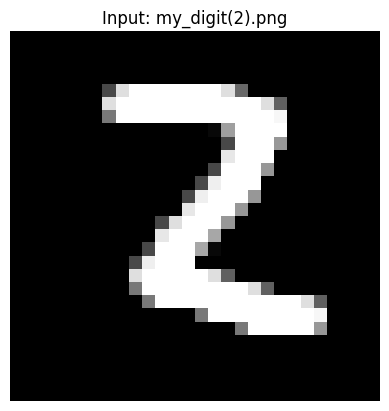

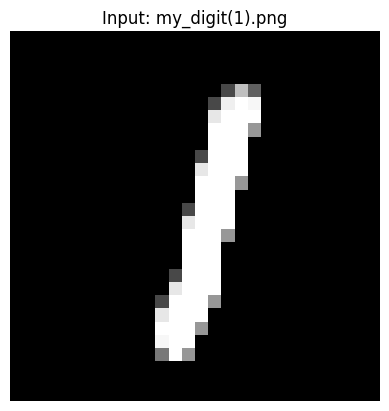

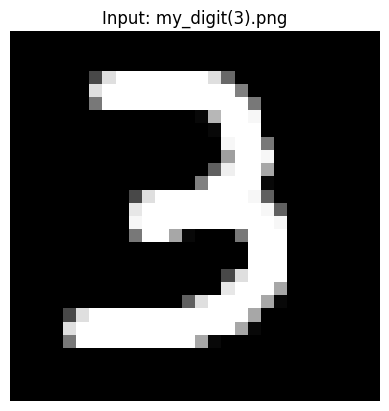

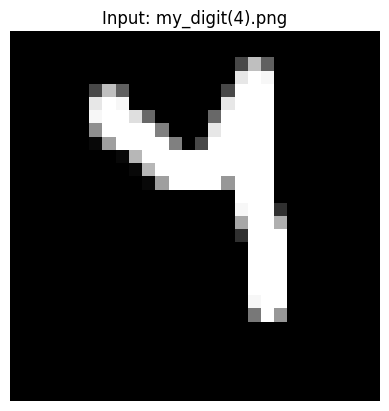

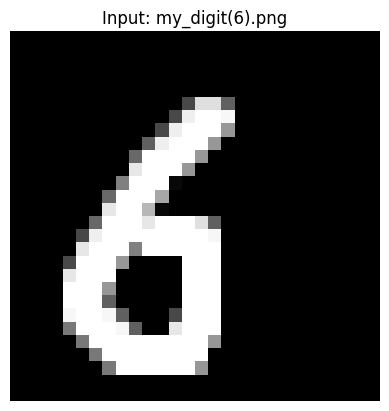

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted digit for my_digit(2).png: 2
Predicted digit for my_digit(1).png: 1
Predicted digit for my_digit(3).png: 3
Predicted digit for my_digit(4).png: 7
Predicted digit for my_digit(6).png: 5


In [48]:

# List of image file names
image_files = ["my_digit(2).png","my_digit(1).png","my_digit(3).png", "my_digit(4).png","my_digit(6).png"]

# To store preprocessed images
images = []

for file in image_files:
    img = Image.open(file).convert("L")  # Grayscale
    img = img.resize((28, 28))           # Resize to 28x28
    img_array = np.array(img) / 255.0    # Normalize

    # Append reshaped image
    images.append(img_array)

    # Show image
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Input: {file}")
    plt.axis("off")
    plt.show()

# Convert to NumPy array with shape (batch_size, 28, 28)
images_np = np.array(images)

# Predict
predictions = model.predict(images_np)

# Print predictions
for i, pred in enumerate(predictions):
    predicted_digit = np.argmax(pred)
    print(f"Predicted digit for {image_files[i]}: {predicted_digit}")
